# Analisis Impacto COVID19

## Contenido 

- 1. Introducción 
- 2. Chequeo de los datos
- 3. Valores Nulos - Tratamiento
- 4. Visualización 
    - 4.1 Document & Genero analysis
    - 4.2 Incorpora Project analysis
    - 4.3 Estado & Genero analysis
    - 4.4 Vivienda & Alimentación analisys
    - 4.5 Other Visualizatins and Analysis
        - 4.5.1 Objetivo Laboral
        - 4.5.2 Municipio
        - 4.5.3 Seguimiento servicios sociales & empadronamiento & targeta sanitaria
        - 4.5.4 Expectativas sobre Integramenet
        - 4.5.5 Autoevaluación psico-emocional

## 1 Introducción 

Analysis de la crisis social tras el impacto del COVID19 entre los colectivos de la Fundación Integramanet.

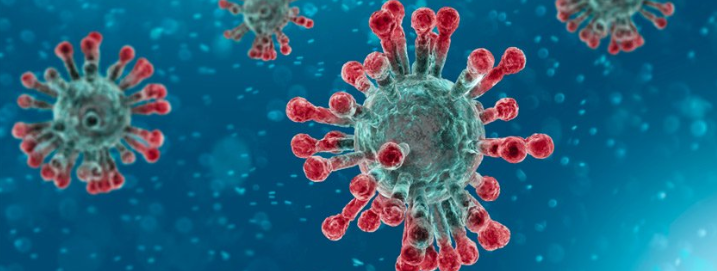

In [1]:
from IPython.core.display import Image
Image("COVID19.png")

## 2 Chequeo de los datos 

In [2]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load the dataset

df = pd.read_csv('./FD_COVID19_DATOS.csv', sep=';',encoding='latin1')
df.head()

Documento Genero Incorpora Projecto Objectivo Laboral            Estado  \
0       NIE      M                 si        Cuidador/a       Confinado/a   
1       NIE      M                 si        Cuidador/a       Confinado/a   
2       PSS      M                 si        Cuidador/a  Busqueda trabajo   
3       NIE      H                 no          Limpieza           Trabaja   
4       PSS      H                 no   Paseador pedros  Busqueda trabajo   

  Ultima accion                                   Ultimas Acciones  \
0         Marzo                          Cuida net, filla treballa   
1         Abril  Segueix treballant en el mateix domicili, pero...   
2         Enero                                                NaN   
3         Marzo                                   Compet Tècniques   
4         Enero                                                NaN   

  Estado Salud          Vivienda  \
0        Bueno    No ha cambiado   
1        Bueno    No ha cambiado   
2        Bueno  Critica/Incierta   
3        Bueno    No ha cambiado   
4        Bueno    No ha cambiado   

                                Condiciones Vivienda  ...  \
0  Bones. Viu amb filla, gendre i 1 net. Petita t...  ...   
1  Considera que bones. Viu amb fill i marit en 2...  ...   
2  Viu en habitació propietat de la persona on tr...  ...   
3                                                NaN  ...   
4                          Porta 2 mesos sense pagar  ...   

         Recursos Recomendados Formacion en Linea Bajas Unnamed: 22  \
0  Refuerzo Servicios Sociales                NaN    NO         NaN   
1                          NaN                NaN    NO         NaN   
2                          NaN                NaN    NO         NaN   
3                          NaN                NaN    NO         NaN   
4                      Treball                NaN    NO         NaN   

  Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  
0         NaN         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN         NaN         NaN  

[5 rows x 29 columns]

In [4]:
#Check the shape of the dataset
df.shape

(170, 29)

In [5]:
#remove the columns created by defaul without any values
df.drop(['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'], axis = 1, inplace = True)

In [6]:
#remove the "ultima accio" column, which does not provide any added value (kepping in mind the feedback of Neus)
df.drop(['Ultima accion'], axis = 1, inplace = True)

In [7]:
#check the dataset after removing the previous variables
df.head()

Documento Genero Incorpora Projecto Objectivo Laboral            Estado  \
0       NIE      M                 si        Cuidador/a       Confinado/a   
1       NIE      M                 si        Cuidador/a       Confinado/a   
2       PSS      M                 si        Cuidador/a  Busqueda trabajo   
3       NIE      H                 no          Limpieza           Trabaja   
4       PSS      H                 no   Paseador pedros  Busqueda trabajo   

                                    Ultimas Acciones Estado Salud  \
0                          Cuida net, filla treballa        Bueno   
1  Segueix treballant en el mateix domicili, pero...        Bueno   
2                                                NaN        Bueno   
3                                   Compet Tècniques        Bueno   
4                                                NaN        Bueno   

           Vivienda                               Condiciones Vivienda  \
0    No ha cambiado  Bones. Viu amb filla, gendre i 1 net. Petita t...   
1    No ha cambiado  Considera que bones. Viu amb fill i marit en 2...   
2  Critica/Incierta  Viu en habitació propietat de la persona on tr...   
3    No ha cambiado                                                NaN   
4    No ha cambiado                          Porta 2 mesos sense pagar   

  Municipio  ... Alimentacion garantida Seguimiento Servicioss Sociales  \
0      STCG  ...       Con dificultades                              NO   
1      STCG  ...                     SI                              NO   
2      STCG  ...                Critica                              SI   
3      STCG  ...                     SI                              SI   
4      STCG  ...    SI/Ayuda familiares                              NO   

  Targeta Sanitaria Autovaloració estat psicoemocional     Expectativas  \
0                SI                                NaN  Servei Ocupacio   
1                SI                                  8              NaN   
2                SI                                  5  Servei Ocupacio   
3                SI                                  7              NaN   
4                SI                                NaN  Servei Ocupacio   

         Necesidades Actuales  \
0           Alimentos/Trabajo   
1  CAP Salut/Seguridad Social   
2          Alimentos/Alquiler   
3  CAP Salut/Seguridad Social   
4            Servei Ocupación   

                                   Resum Entrevista   \
0  Cap persona de la familia no treballa. A l'abr...   
1  Molt bé de salud. Segueix el contracte de dill...   
2  Està amb Serveis Socials. Li estan facilitant ...   
3  Li costa el castellà. Comenta que està treball...   
4  Estàn visquent en una habitació, a casa d'una ...   

         Recursos Recomendados Formacion en Linea Bajas  
0  Refuerzo Servicios Sociales                NaN    NO  
1                          NaN                NaN    NO  
2                          NaN                NaN    NO  
3                          NaN                NaN    NO  
4                      Treball                NaN    NO  

[5 rows x 21 columns]

In [8]:
#short the column names
df.columns = ['documento','genero','incorpora','obj_laboral',
                     'estado', 'ult_accions_hechas','estado_salud',
              'vivienda', 'cond_vivienda','municipio','padron','alimentacion', 'seguimento_ss',
              'targeta_san','autovaloracion_psicoemo', 'espera_dIntegramanet', 'necesidades_actuales', 'resum', 
              'recursos_recom', 'formacion_linea', 'bajas']

In [9]:
#check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 21 columns):
documento                  170 non-null object
genero                     170 non-null object
incorpora                  170 non-null object
obj_laboral                128 non-null object
estado                     137 non-null object
ult_accions_hechas         106 non-null object
estado_salud               164 non-null object
vivienda                   170 non-null object
cond_vivienda              140 non-null object
municipio                  161 non-null object
padron                     153 non-null object
alimentacion               169 non-null object
seguimento_ss              160 non-null object
targeta_san                152 non-null object
autovaloracion_psicoemo    154 non-null object
espera_dIntegramanet       126 non-null object
necesidades_actuales       62 non-null object
resum                      135 non-null object
recursos_recom             45 non-null object
form

## 3 Valores Nulos - Tratamiento

We are going to review how many null values we have in the dataset.

In [10]:
#check how many null values there are in the dataset
df.isnull().sum().sum()

689

There are a total of 689 records with nan values. 

We are going to analyze the dimension of the dataset by columns and rows to decide what columns and rows should be rejected from the dataset.

#### Missings for columns

In [11]:
#Creating table with "% missing"
missing = pd.DataFrame(df.isnull().sum(), columns = ['perc_missing'])
missing = missing.loc[missing['perc_missing'] > 0]
missing = (missing/len(df))*100

print(missing)

                         perc_missing
obj_laboral                 24.705882
estado                      19.411765
ult_accions_hechas          37.647059
estado_salud                 3.529412
cond_vivienda               17.647059
municipio                    5.294118
padron                      10.000000
alimentacion                 0.588235
seguimento_ss                5.882353
targeta_san                 10.588235
autovaloracion_psicoemo      9.411765
espera_dIntegramanet        25.882353
necesidades_actuales        63.529412
resum                       20.588235
recursos_recom              73.529412
formacion_linea             77.058824


In [12]:
#Delete those columns that have more than 60% missing data 
#columns to remove: "baixes", "recerca_feina", "recurs_recom", "necessitats_actuals
df.drop(['bajas', 'recursos_recom', 'formacion_linea', 'necesidades_actuales'], axis = 1, inplace = True)

In [13]:
#check the shape of the training set after removing the variables 
df.shape

(170, 17)

#### Missings for rows

There are rows with a lot of "NaN" values. But we have to be careful ir orden to drop only the "correct" rows. To inspect it quickly first, we get the total nan values for each row.

In [14]:
# To get the total number for each row
nansrows = pd.DataFrame({'total_nans':df.isnull().sum(axis=1)})
nansrows

total_nans
0             1
1             1
2             1
3             2
4             2
5             1
6             2
7             1
8             0
9             0
10            2
11            1
12            0
13            0
14            0
15            1
16            0
17            2
18            2
19            4
20            0
21            1
22            2
23            3
24            1
25            1
26            1
27            3
28            4
29            2
..          ...
140           0
141           0
142           1
143           1
144           0
145           1
146           0
147           0
148           1
149           0
150           0
151           1
152           2
153           1
154           2
155           2
156           1
157           1
158           0
159           1
160           1
161           1
162           3
163           3
164           1
165           1
166           1
167           1
168           1
169           1

[170 rows x 1 columns]

We look wich rows have more than 70% columns with "NaN" values. (i.e. with more than 12 columns empty).

In [15]:
nansrows[nansrows['total_nans']>11].count()

total_nans    0
dtype: int64

We see that there is no any row with more than 70% columns with NaN values.

Now, we extract the total "NaN" values for each column, to look wich columns are the "typical" empty.

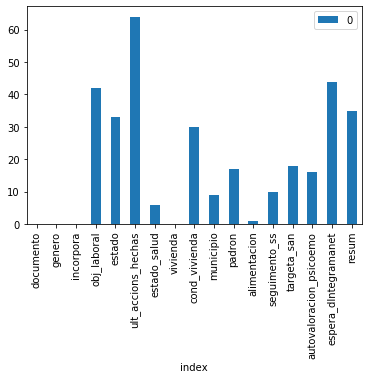

In [16]:
# Counting the total nans for each column
toplot = df.isna().sum()
# Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar')

We can see, that columns _"Document","Genero"_ and _"Incorpora Projecto"_ in all the cases are filled. On the other hand, _"Ultimas acciones"_ and _"Expectativas"_ are almost empty in the whole dataframe. 

We think that column _"Resum Entrevista"_ is important, and definitely if it is filled, is because the interview was do it and we will keep this column as the "signal" of an interview performed. In conclusion, __we will drop rows with cell "resum" empty__. 


In [17]:
#check the 'nan' values in the resum variable
df['resum'].isnull().sum().sum()

35

In [18]:
# Eliminating 'nan' values 
df.dropna(subset = ['resum'], inplace=True)

In [19]:
df.shape

(135, 17)

So, the Dataset now has as shape 140 rows. Depending of the techiques to apply, this is a "low" amount of data.

Lets see with this "new" dataset how many rows are with "NaNs"

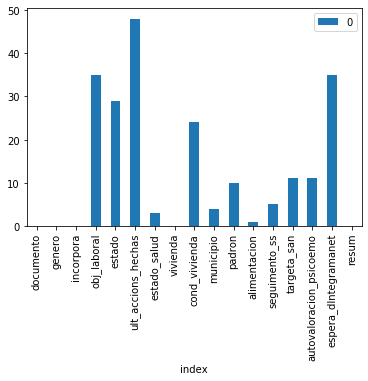

In [20]:
# Couting the total nans for each column
toplot = df.isna().sum()
# Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar')

In [21]:
#"saving" the final dataframe after this preprocessing
df.to_pickle("./dataframe.pkl") #-> here I have the dataset prepared before completing it

In [22]:
#If we want to reload it (in order to avoid redoing the above)
#df = pd.read_pickle('dataframe.pkl') 

## 4 Visualización de datos  

### 4.1 Document & Gender analysis

In [23]:
# document frequency table
pd.value_counts(df['documento'])

PSS    89
NIE    32
DNI    14
Name: documento, dtype: int64

In [24]:
# document relateive frequency table
100 * df['documento'].value_counts() / len(df['documento'])

PSS    65.925926
NIE    23.703704
DNI    10.370370
Name: documento, dtype: float64

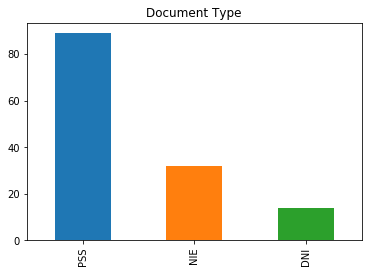

In [161]:
#Document bar chart
plot = df['documento'].value_counts().plot(kind='bar', color=['tab:blue','tab:orange','tab:green'], title='Document Type')

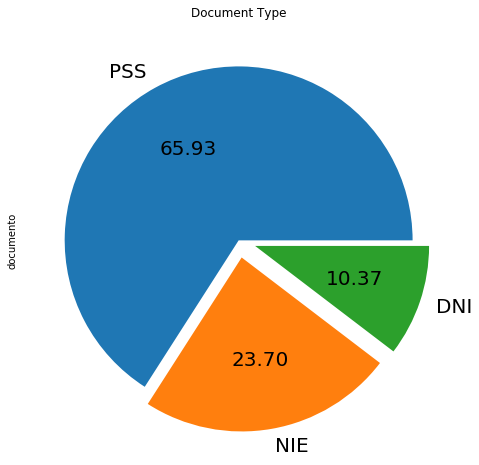

In [192]:
# Document Pie chart 
plot = df['documento'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8, 8),  explode = (0, 0.1, 0.1), title='Document Type',
                                          fontsize = 20)

In [27]:
# gender frequency table
pd.value_counts(df['genero'])

M    112
H     23
Name: genero, dtype: int64

In [28]:
# gender relateive frequency table
100 * df['genero'].value_counts() / len(df['genero'])  

M    82.962963
H    17.037037
Name: genero, dtype: float64

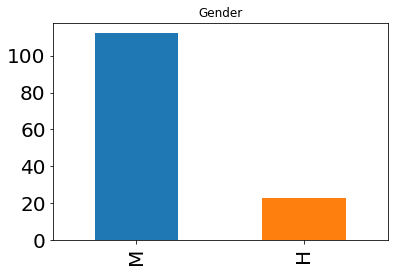

In [191]:
#Gender bar chart
plot = df['genero'].value_counts().plot(kind='bar', color=['tab:blue','tab:orange'], title='Gender', fontsize = 20)

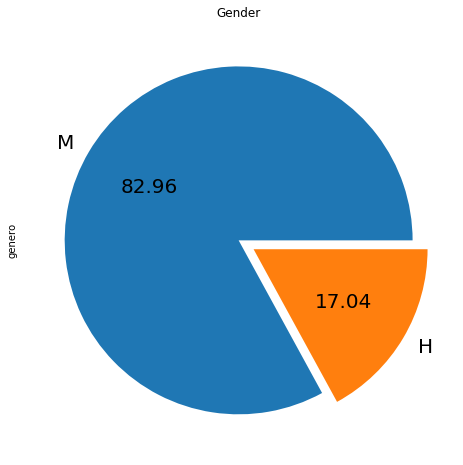

In [190]:
# Gender Pie chart 
plot = df['genero'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8, 8), explode = (0, 0.1), title='Gender', 
                                        fontsize = 20)

In [31]:
# document/gender contigency table
pd.crosstab(index=df['genero'], columns=df['documento'], margins=True)

documento  DNI  NIE  PSS  All
genero                       
H            3    7   13   23
M           11   25   76  112
All         14   32   89  135

In [32]:
# document/gender total contigency relative table
pd.crosstab(index=df['genero'], columns=df['documento'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

documento        DNI        NIE        PSS         All
genero                                                
H           2.222222   5.185185   9.629630   17.037037
M           8.148148  18.518519  56.296296   82.962963
All        10.370370  23.703704  65.925926  100.000000

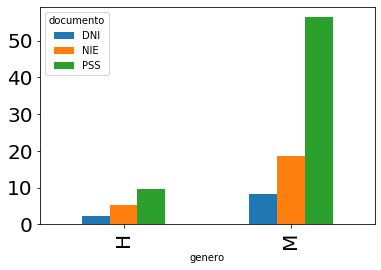

In [193]:
# Gráfico de barras de genero segun documento
plot = pd.crosstab(index=df['genero'],
            columns=df['documento']).apply(lambda r: r/len(df) *100,axis=1).plot(kind='bar', color=['tab:blue','tab:orange','tab:green'], fontsize = 20)

__Documento & Genero - Commentarios:__

* Observamos el predominio del colectivo feminimo frente al masculino, pues las muejeres rerpesentan cerca de un 83% de la muestra total, mientras que los hombres a penas superan el 17% del total de los datos. Esta información nos hace ver/reflexionar que las mujeres representan un colectivo con multiples necesidades que más acude a la fundación Integramenet solicitando ayuda y/o aseoramiento.

* Respecto a la documentación, un total del 66% solo dispone de pasaporte, lo cual indica que no dispone de permisos para permanecer en el país durante un perido de tiempo largo o solicitar empleo de forma legal. Por otra parte, del 34% restante,  un 10% dispone de DNI y el 24% de NIE, por lo que disponen de más facilidades y respaldo legal para obtar a ayudas y/o empleo.

### 4.2 Incorpora Project Analysis

Analysis of the **Incorpora Project** variable, includding the effect of *document* and *gender* variable.

__"Incopora"__ column => It is a labor insertion project of Obra Social "La Caixa", in which we participate as *Punto Incorpora*. People who have DNI or NIE and can be hired enter directly into this program.

In [34]:
# Incorpora frequency table
pd.value_counts(df['incorpora'])

no    81
si    54
Name: incorpora, dtype: int64

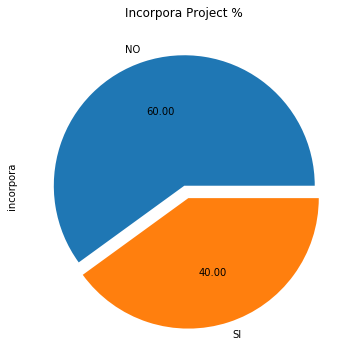

In [177]:
# Incorpora Pie chart 

plot = df['incorpora'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), labels= ['NO', 'SI'], explode = (0, 0.1), title='Incorpora Project %')

In [36]:
# document/incorpora contigency table
pd.crosstab(index=df['incorpora'], columns=df['documento'], margins=True)

documento  DNI  NIE  PSS  All
incorpora                    
no           3   12   66   81
si          11   20   23   54
All         14   32   89  135

In [37]:
# document/Incorpora total contigency relative table
pd.crosstab(index=df['incorpora'], columns=df['documento'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

documento        DNI        NIE        PSS    All
incorpora                                        
no          2.222222   8.888889  48.888889   60.0
si          8.148148  14.814815  17.037037   40.0
All        10.370370  23.703704  65.925926  100.0

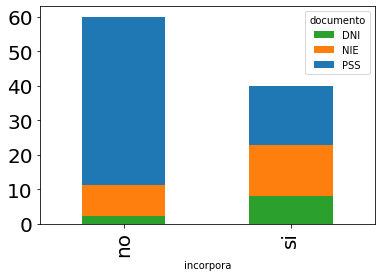

In [194]:
# Gráfico de barras de Incorpora Project segun documento
plot = pd.crosstab(index=df['incorpora'],
            columns=df['documento']
                  ).apply(lambda r: r/len(df) *100,
                          axis=0).plot(kind='bar', stacked=True, color=['tab:green','tab:orange','tab:blue'], fontsize = 20)

In [39]:
# gender/Incorpora total contigency relative table
pd.crosstab(index=df['incorpora'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero             H          M    All
incorpora                             
no         11.851852  48.148148   60.0
si          5.185185  34.814815   40.0
All        17.037037  82.962963  100.0

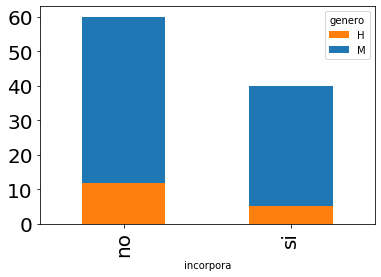

In [195]:
# Gráfico de barras de Incorpora Project segun documento
plot = pd.crosstab(index=df['incorpora'],
            columns=df['genero']
                  ).apply(lambda r: r/len(df) *100,
                          axis=0).plot(kind='bar', color=['tab:orange','tab:blue'], stacked=True, fontsize = 20)

__Conclusiones:__
* Del total de 135 registros, el 60% no se han acogido al proyecto de Incorpora (un total de 81 registros), mientras que el 40% sí se ha acogido (un total de 54 de registros).
* De las personas que se han acogido al proyecto de incorporación laboral, cerca del 35% eran mujeres y el 5% restante eran hombres. Además, de esta parte de la muestra hemos observado que cerca de un 17% de las muestras disponen de pasaporte, un 15% de DNI y el 8% restante dispone de DNI.
* Respecto a las personas que no se han acogido al proyecto, observamos que el 48% son mujers y el 11% son hombres. Además, extraemos que la mayoria de las personas solo disponen de pasaporte, mientras que a penas un 11% tienen DNI y NIE.

### 4.3 Estado 

#### a) Limpieza de datos 

In [132]:
# estado frequency table
df['estado'].head(15)

0          Confinado/a
1          Confinado/a
2     Busqueda trabajo
3              Trabaja
4     Busqueda trabajo
6              Trabaja
7     Busqueda trabajo
8              Trabaja
9     Busqueda trabajo
10                 NaN
11         Confinado/a
12             Trabaja
13             Trabaja
14    Busqueda trabajo
15    Busqueda trabajo
Name: estado, dtype: object

In [133]:
df['estado'] = df['estado'].replace(np.nan, 'no proporcionado', regex=True)

In [134]:
#-> Convirtiendo minúsculas a mayúsculas
df['estado'] = df['estado'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [135]:
# estado frequency table
pd.value_counts(df['estado'])

busqueda trabajo    48
no proporcionado    29
confinado/a         25
trabaja             22
no trabaja          10
embarazada           1
Name: estado, dtype: int64

#### b) Visualizaciones  

In [136]:
# estado relateive frequency table
100 * df['estado'].value_counts() / len(df['estado'])

busqueda trabajo    35.555556
no proporcionado    21.481481
confinado/a         18.518519
trabaja             16.296296
no trabaja           7.407407
embarazada           0.740741
Name: estado, dtype: float64

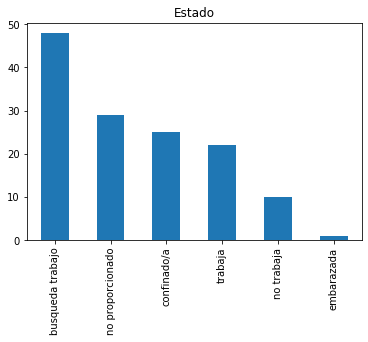

In [137]:
#estado bar chart
plot = df['estado'].value_counts().plot(kind='bar',
                                            title='Estado')

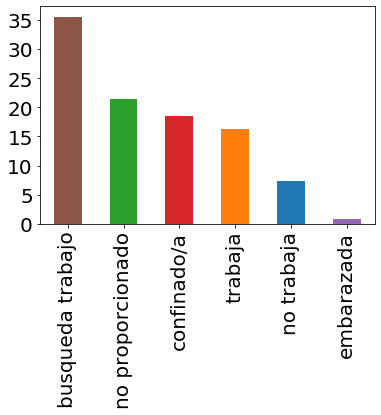

In [210]:
# estado bar chart of relative frequency 
plot = (100 * df['estado'].value_counts() / len(df['estado'])).plot(
kind='bar', color = ['tab:brown', 'tab:green', 'tab:red', 'tab:orange', 'tab:blue', 'tab:purple'], fontsize = 20)

__Estado Salud Conclusiones:__

* Cerca del 36% de las personas estan buscando trabajo
* Tenemos 22% que "no conocemos" su condición...
* 18% están confinados
* 7% no trabaja

Estos "estados" son los proporcionados a la hora de la entervista. Yo en particular creo que no son "absolutos", es decir  podrá haber personas buscando trabajo y actualmente confinados, o confinados y trabajando...

### 4.4 Vivienda & Alimentación analysis

#### 4.4.1 Análisis de la variable *Vivienda*

#### a) Limpieza de datos 

In [41]:
#df = pd.read_pickle('dataframe.pkl') 

In [42]:
df['vivienda'].head(15)

0        No ha cambiado
1        No ha cambiado
2      Critica/Incierta
3        No ha cambiado
4        No ha cambiado
6                    OK
7        No ha cambiado
8        No ha cambiado
9      Con dificultades
10         Casa ocupada
11    Piso en propiedad
12     Con dificultades
13       No ha cambiado
14       No ha cambiado
15     Critica/Incierta
Name: vivienda, dtype: object

In [43]:
#-> Converting lowercase to uppercase
df['vivienda'] = df['vivienda'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [44]:
#replace the value "ok" for "garantizada"
df['vivienda'] = df['vivienda'].replace(['ok'], 'garantizada')

In [45]:
#replace the value "piso en propiedad" for "garantizada"
df['vivienda'] = df['vivienda'].replace(['piso en propiedad'], 'garantizada')

In [46]:
#replace the value "asistenta" for "ayuda familiares"
df['vivienda'] = df['vivienda'].replace(['asistenta'], 'ayuda de familiares')

In [47]:
#replace the value "con dificultades" for "dificultades pago alquiler"
df['vivienda'] = df['vivienda'].replace(['con dificultades'], 'dificultades pago alquiler')

In [48]:
#replace the value "dificultades en pagar el alquiler" for "dificultades pago alquiler"
df['vivienda'] = df['vivienda'].replace(['dificultades en pagar el alquiler'], 'dificultades pago alquiler')

#### b) Visualizaciones 

In [49]:
# habitatge frequency table
pd.value_counts(df['vivienda'])

no ha cambiado                43
dificultades pago alquiler    32
garantizada                   28
critica/incierta              25
casa ocupada                   3
ayuda de familiares            3
albergue                       1
Name: vivienda, dtype: int64

In [50]:
#habitatge relateive frequency table
100 * df['vivienda'].value_counts() / len(df['vivienda'])  

no ha cambiado                31.851852
dificultades pago alquiler    23.703704
garantizada                   20.740741
critica/incierta              18.518519
casa ocupada                   2.222222
ayuda de familiares            2.222222
albergue                       0.740741
Name: vivienda, dtype: float64

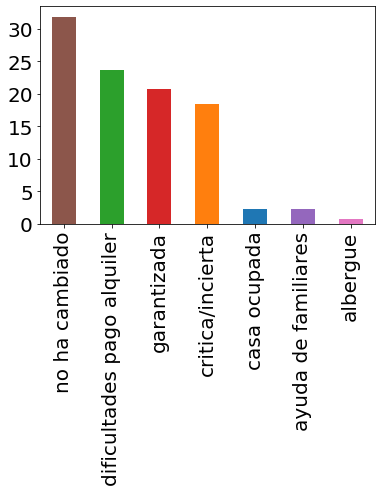

In [208]:
# estado bar chart of relative frequency 
plot = (100 * df['vivienda'].value_counts() / len(df['vivienda'])).plot(
kind='bar', fontsize = 20, color = ['tab:brown', 'tab:green', 'tab:red', 'tab:orange', 'tab:blue', 'tab:purple', 'tab:pink'])

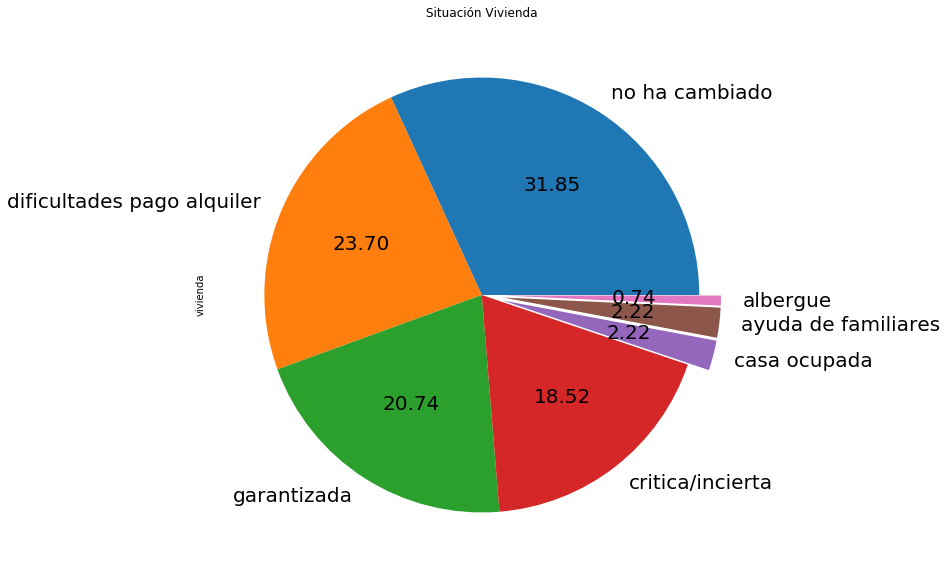

In [203]:
# habitatge pie chart 
plot = df['vivienda'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(10, 10), explode = (0, 0, 0, 0, 0.1, 0.1, 0.1),
                                          title='Situación Vivienda', fontsize = 20)

#### c) Cruce de datos entre las variables "Vivienda" y "Genero" 

In [52]:
# gender/habitatge total contigency relative table
pd.crosstab(index=df['vivienda'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero                              H          M         All
vivienda                                                    
albergue                     0.740741   0.000000    0.740741
ayuda de familiares          0.000000   2.222222    2.222222
casa ocupada                 1.481481   0.740741    2.222222
critica/incierta             1.481481  17.037037   18.518519
dificultades pago alquiler   1.481481  22.222222   23.703704
garantizada                  5.185185  15.555556   20.740741
no ha cambiado               6.666667  25.185185   31.851852
All                         17.037037  82.962963  100.000000

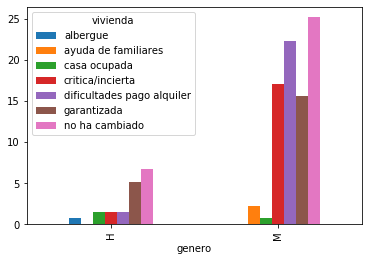

In [53]:
# Habitatge Bar chart by gender 
plot = pd.crosstab(index=df['genero'],
            columns=df['vivienda']).apply(lambda r: r/len(df) *100,
                                              axis=1).plot(kind='bar')

__Vivienda Commentarios:__

* Observamos que solo el 20% del total de la muestra analizada puede tener una vivienda garantizada. 

* El 23,70% tiene dificultades para pagar el alquiler (el 22% son mujeres y el resto hombres) y cerca del 19% se encuentra en una situación incierta (altas posibilidades de perder la vivienda).

* El restante 5% recibe ayuda de familiares o vivien en albergues. Además, dentro de dicho porcentaje un 2% se encuentra con la vivienda ocupada. 

* Del total de la muestra, un 32% no ha cambiado su situación en vivienda con respecto a la última revisión con Integramenet. __¿Esto es negativo o positivo?__


#### 4.4.2 Análisis de la variable *Alimentación*

#### a) Limpieza de datos 

In [54]:
df['alimentacion'].head(15)

0                     Con dificultades
1                                   SI
2                              Critica
3                                   SI
4                  SI/Ayuda familiares
6                                  NaN
7     Critica/Ayuda Servicios Sociales
8                                   SI
9     Critica/Ayuda Servicios Sociales
10          Critica/Problemas de salud
11                    Con dificultades
12                                  SI
13                    Con dificultades
14                                  SI
15                    Con dificultades
Name: alimentacion, dtype: object

In [55]:
#replace nan values for "No proporcionado"
df['alimentacion'] = df['alimentacion'].replace(np.nan, 'no proporcionado', regex=True)

In [56]:
#-> Converting lowercase to uppercase
df['alimentacion'] = df['alimentacion'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [57]:
#replace the value "critica/problemas de salud" for "critica"
df['alimentacion'] = df['alimentacion'].replace(['critica/problemas de salud'], 'critica')

In [58]:
#Grouping "ayuda servicios sociales" variables
df['alimentacion'] = df['alimentacion'].replace(['critica/ayuda servicios sociales',
                                               'con dificultades/ayuda servicios sociales', 
                                               'si/ayuda servicios sociales'], 'ayuda servicios sociales')

In [59]:
#Grouping "ayuda familiares" variables
df['alimentacion'] = df['alimentacion'].replace(['con dificultades/ayuda familiares', 'critica/ayuda familiares',
                                               'si/ayuda familiares'], 'ayuda familiares')

In [60]:
#replace the value "con dificultades/donacion de alimentos" for "donacion alimentos"
df['alimentacion'] = df['alimentacion'].replace(['con dificultades/donacion de alimentos'], 'donacion de alimentos')

In [61]:
#replace the value "si" for "garantizada"
df['alimentacion'] = df['alimentacion'].replace(['si'], 'garantizada')

#### b) Some Visualizations

In [62]:
# alimentacio frequency table
pd.value_counts(df['alimentacion'])

garantizada                 51
con dificultades            36
critica                     29
ayuda servicios sociales     9
ayuda familiares             8
donacion de alimentos        1
no proporcionado             1
Name: alimentacion, dtype: int64

In [63]:
#habitatge relateive frequency table
100 * df['alimentacion'].value_counts() / len(df['alimentacion'])  

garantizada                 37.777778
con dificultades            26.666667
critica                     21.481481
ayuda servicios sociales     6.666667
ayuda familiares             5.925926
donacion de alimentos        0.740741
no proporcionado             0.740741
Name: alimentacion, dtype: float64

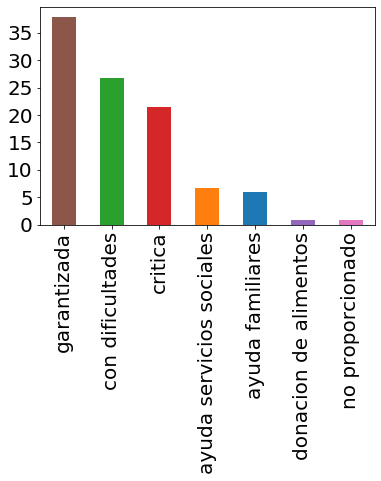

In [207]:
#alimentacio bar chart
plot = (100 * df['alimentacion'].value_counts() / len(df['alimentacion'])).plot(kind='bar', fontsize = 20, 
                                                                                color = ['tab:brown', 'tab:green', 'tab:red', 
                                                                                         'tab:orange', 'tab:blue', 'tab:purple',
                                                                                        'tab:pink'])

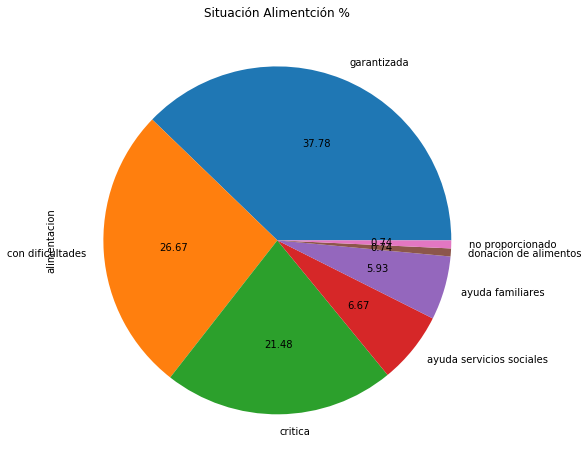

In [65]:
# habitatge pie chart 
plot = df['alimentacion'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8, 8), title='Situación Alimentción %')

#### c) Crucede datos entre las variables "alimentacion & genero"  

In [66]:
# "Alimentacion" total contigency relative table
pd.crosstab(index=df['alimentacion'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero                            H          M         All
alimentacion                                              
ayuda familiares           1.481481   4.444444    5.925926
ayuda servicios sociales   0.740741   5.925926    6.666667
con dificultades           2.962963  23.703704   26.666667
critica                    2.962963  18.518519   21.481481
donacion de alimentos      0.740741   0.000000    0.740741
garantizada                7.407407  30.370370   37.777778
no proporcionado           0.740741   0.000000    0.740741
All                       17.037037  82.962963  100.000000

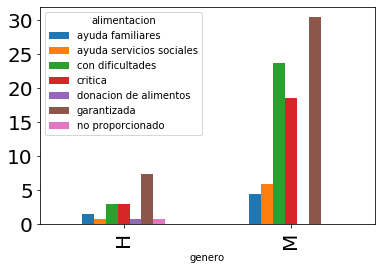

In [206]:
# Alimentacio Bar chart by gender 
plot = pd.crosstab(index=df['genero'],
            columns=df['alimentacion']).apply(lambda r: r/len(df) *100, 
                                              axis=1).plot(kind='bar', fontsize = 20)

__Alimentacion Commentarios:__

* Se observa que solo el 37,78% del total de la muestra analizada alega tener garantizada la alimentación sin acudir a ayudas sociales o de familiares.
* Respecto a la parte de la población con problemas para acceder a la población, observamos que el 21,48% se encuentra en estado critico para conseguir alimentos, mientras que el 26% puede acceder a los alimentos pero con ciertas dificultades. Por otra parte, se observa que el colectivo feminino lidera ambas situaciones, pues del total de la muestra con dificultades para acceder a los alimentos ellas superan el 23%, mientras que en la categoria critica de acceso a los alimentos los hombres solo representan el 2,85% sobre el total del 26.77%. 
* Un 13,31% de la muestra se ve obligado a solicitar ayuda de familiares, servicios sociales o donativos de alimentos para poer cubrir dicha necesidad básica.


### 4.5  Otras Visualizations y Analysis

#### 4.5.1  Objetivo Laboral

#### a) Limpieza de datos 

In [68]:
df['obj_laboral'].head(10)

0          Cuidador/a
1          Cuidador/a
2          Cuidador/a
3            Limpieza
4     Paseador pedros
6      Mozo/a Almacen
7          Cuidador/a
8          Cuidador/a
9          Cuidador/a
10                NaN
Name: obj_laboral, dtype: object

In [69]:
#replace nan values for "No proporcionado"
df['obj_laboral'] = df['obj_laboral'].replace(np.nan, 'no proporcionado', regex=True)

In [70]:
# Converting lowercase to uppercase
df['obj_laboral'] = df['obj_laboral'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [71]:
#replace '3 objectius' values for "cuidador/a" (the most frequent value)
df['obj_laboral'] = df['obj_laboral'].replace('3 objectius', 'cuidador/a', regex=True)

#### b) Visualizaciones 

In [72]:
# Objetivo Laboral frequency table
pd.value_counts(df['obj_laboral'])

cuidador/a                         82
no proporcionado                   35
limpieza                            5
mozo/a almacen                      1
reformas                            1
dependienta                         1
conserge                            1
almacen                             1
manipulación                        1
vigilante                           1
auxiliar servicios                  1
programador                         1
reponedora supermercado/fabrica     1
administracion                      1
ferreteria                          1
paseador pedros                     1
Name: obj_laboral, dtype: int64

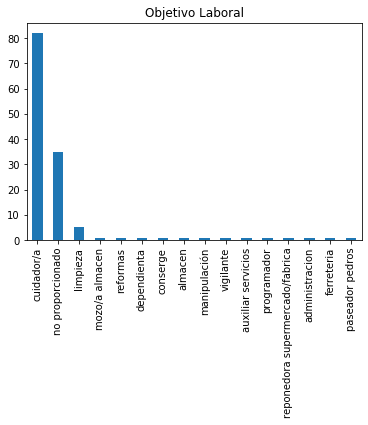

In [73]:
#Objetivo Laboral bar chart
plot = df['obj_laboral'].value_counts().plot(kind='bar', title='Objetivo Laboral')

#### c) Cruce de datos entre las variables "Objetivo Laboral"  y "Genero" 

In [74]:
# "Objetivo Laboral" total contigency relative table
pd.crosstab(index=df['obj_laboral'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero                                   H          M         All
obj_laboral                                                      
administracion                    0.740741   0.000000    0.740741
almacen                           0.740741   0.000000    0.740741
auxiliar servicios                0.740741   0.000000    0.740741
conserge                          0.740741   0.000000    0.740741
cuidador/a                        2.962963  57.777778   60.740741
dependienta                       0.000000   0.740741    0.740741
ferreteria                        0.740741   0.000000    0.740741
limpieza                          1.481481   2.222222    3.703704
manipulación                      0.000000   0.740741    0.740741
mozo/a almacen                    0.740741   0.000000    0.740741
no proporcionado                  5.925926  20.000000   25.925926
paseador pedros                   0.740741   0.000000    0.740741
programador                       0.740741   0.000000    0.740741
reformas                          0.000000   0.740741    0.740741
reponedora supermercado/fabrica   0.000000   0.740741    0.740741
vigilante                         0.740741   0.000000    0.740741
All                              17.037037  82.962963  100.000000

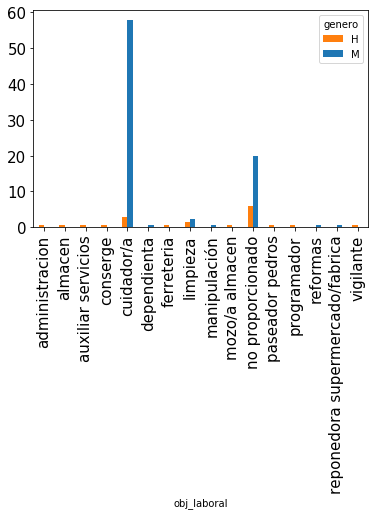

In [229]:
# Objetivo Laboral Bar chart by gender 
plot = pd.crosstab(index=df['obj_laboral'],
            columns=df['genero']).apply(lambda r: r/len(df) *100,
                                              axis=1).plot(kind='bar', fontsize = 15, color = ['tab:orange', 'tab:blue'])

__Objetivo Laboral - Commentarios:__
* Observamos que cerca de un 26% de la muestra analizada no ha proporcionado datos sobre dicha variable. __¿Esto es bueno o malo?__
* Del 74% restante (lo que supone un total de 85 registros), vemos que el 61% manifiesta interés en buscar trabajo de cuidador/a, en el cual destaca el coletivo de mujeres representando (93% sobre el total de registros bajo la categoria de cuidador/a, mientras que los hombres solo representan cerca de un 7% en dicha categoria). 
* Respecto al colectivo masculino, observamos que sus preferencias están repartidas entre diversas profesiones, como mozo de almacén, vigilante, conserge, etc.

#### 4.5.2 Municipio 

#### a) Limpieza de datos 

In [76]:
df['nunicipio'] = df['municipio'].replace(np.nan, 'no proporcionado', regex=True)

In [77]:
df['municipio'].value_counts()

STCG          108
Barcelona      10
Badalona        4
Sant Adrià      3
Sabadell        2
Hospitalet      1
Castilla        1
tarrassa        1
x               1
Name: municipio, dtype: int64

Tenemos que unificar texto para construir el mapa:
- 'SCG':'STCG', 'x', 'scg', 'STC'
- 'BDL' : 'Badalona','Bdn' 
- 'BCN': 'Barcelona', 
- 'Sant Adria': 'Sant Adrian B'

In [78]:
mymap = {'SCG': 'SCG',
'STCG' : 'SCG', 
'x':'SCG',
'scg':'SCG', 
'STC':'SCG',
'SGC': 'SCG',
'BDL':'BDL',
'BND':'BDL',
'Badalona': 'BDL',
'Bdn': 'BDL',
'Barcelona': 'BCN',
'BCN': 'BCN', 
'Sant Adria': 'Sant Adria',
'Sant Andria': 'Sant Adria',
'Sant Adria B':'Sant Adria',  
'Sabadell':'Sabadell',
'Sabadell': 'Sabadell, però vol tornar a STCG. Demanarà a una amiga que està interna que li llogi habitació', 
'Castilla':'Castilla', 
'Via Julia' : 'Via Julia', 
'tarrassa': 'Terrassa',
'Plaza espanya': 'BCN',
'Sant Andreu': 'Sant Andreu',
'Hospitalet': 'Hospitalet',        
'Sant Cugat':'Sant Cugat',
'no proporcionado': 'No proporcionado'}

df['municipio'] = df['municipio'].map(mymap)

In [79]:
#chequeamos los resultados en el dataframe
df['municipio'].value_counts()

SCG                                                                                               109
BCN                                                                                                10
BDL                                                                                                 4
Sabadell, però vol tornar a STCG. Demanarà a una amiga que està interna que li llogi habitació      2
Terrassa                                                                                            1
Hospitalet                                                                                          1
Castilla                                                                                            1
Name: municipio, dtype: int64

Usamos __OpenCageGeocode__ para obtener la "latitud" y "longitud" de cada sitio. 

Los registros "no proporcionados" no los incluiremos en el mapa, ya que no sabemos a qué municipio hacen referencia. 


In [80]:
#Importarmos los datos desde un código generado en local, por que teniamos problemas con JNotebook. 

info_geo = pd.read_pickle('info_municipi.pkl') 

In [81]:
info_geo

Names  NbPeople        lat       lon
0  Santa Coloma de Gramanet       129  41.451563  2.208337
1                  Badalona        10  41.449354  2.248254
2                 Barcelona         9  41.382894  2.177432
3       Sant Adria de Besos         2  41.430483  2.218278
4                  Terrassa         1  41.562989  2.010244
5                 Via Julia         1  41.443847  2.178604
6               Sant Andreu         1  41.437439  2.196859
7  LHospitalet de Llobregat         1  41.359860  2.099793
8                  Castilla         1  40.474989 -3.680451
9                Sant Cugat         1  41.467969  2.078239

#### b) Visualización del mapa 

Vamos a graficar un mapa para ver la posición de las personas a las que se atiende en la Fundació Integramenet.

In [82]:
import plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go

fig = px.scatter_mapbox(info_geo, lat="lat", lon="lon", size = "NbPeople", hover_name="Names",
                        color_discrete_sequence=["blue"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

En el mapa tenemos los puntos donde se encuentras las personas a las que se dio seguimiento y el lugar donde viven. Claramente, __la mayoría__ de las personas se encuentra en __"Santa Coloma" (129 personas)__, pero también por los alrededores, como __"Badalona y Sant Adriá" (10 y 2 personas)__. También hay un grupo en __Barcelona (10 personas)__. 

#### 4.5.3 Seguimiento "Servicios Sociales" & "Padron" & "Tarjeta Sanitaria"

#### a) Servicios Sociales

In [83]:
df['seguimento_ss'].head(10)

0     NO
1     NO
2     SI
3     SI
4     NO
6     NO
7     NO
8     NO
9     NO
10    NO
Name: seguimento_ss, dtype: object

In [84]:
#replace nan values for "No proporcionado"
df['seguimento_ss'] = df['seguimento_ss'].replace(np.nan, 'no proporcionado', regex=True)

In [85]:
# Converting lowercase to uppercase
df['seguimento_ss'] = df['seguimento_ss'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [86]:
# Servicios Sociales frequency table
pd.value_counts(df['seguimento_ss'])

no                                94
si                                32
no proporcionado                   5
no/sin cita                        2
x                                  1
si/no todo servicios cubiertos     1
Name: seguimento_ss, dtype: int64

In [87]:
#replace 'x' values for "Si"
df['seguimento_ss'] = df['seguimento_ss'].replace('x', 'si')

In [88]:
#replace 'no/sin cita ' values for "No"
df['seguimento_ss'] = df['seguimento_ss'].replace('no/sin cita', 'no')

In [89]:
#replace 'si/no todo servicios cubiertos' for 'No todo servicios cubiertos"
df['seguimento_ss'] = df['seguimento_ss'].replace('si/no todo servicios cubiertos', 'no todos servicios cubiertos')

In [90]:
# Servicios Sociales frequency table
pd.value_counts(df['seguimento_ss'])

no                              96
si                              33
no proporcionado                 5
no todos servicios cubiertos     1
Name: seguimento_ss, dtype: int64

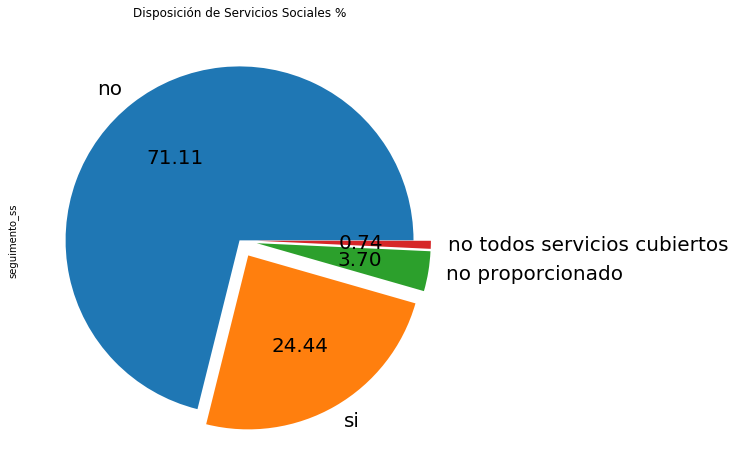

In [218]:
#Servicios Sociales Pie chart 
plot = df['seguimento_ss'].value_counts().plot(kind='pie', autopct='%.2f', figsize= (8, 8), fontsize = 20,
                                             title='Disposición de Servicios Sociales %', explode = (0, 0.1, 0.1, 0.1))

#### b) Padron

In [92]:
df['padron'].head(10)

0     SI
1     SI
2     SI
3     SI
4     SI
6     SI
7     SI
8     SI
9     SI
10    NO
Name: padron, dtype: object

In [93]:
#replace 'x' values for "si"
df['padron'] = df['padron'].replace('x', 'si')

In [94]:
#replace nan values for "no proporcionado"
df['padron'] = df['padron'].replace(np.nan, 'no proporcionado', regex=True)

In [95]:
# Converting lowercase to uppercase
df['padron'] = df['padron'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [96]:
# Padron frequency table
pd.value_counts(df['padron'])

si                  107
no                   18
no proporcionado     10
Name: padron, dtype: int64

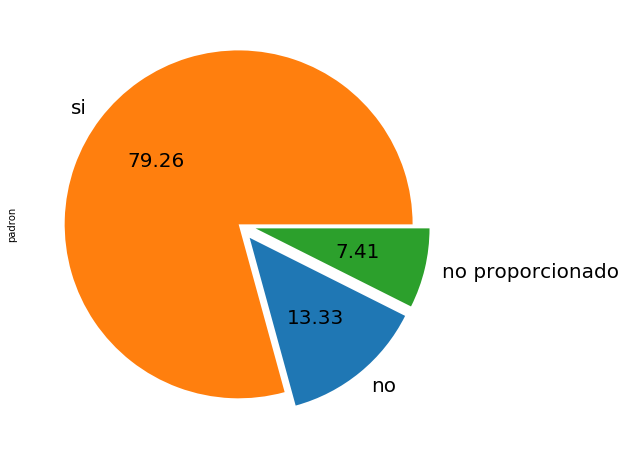

In [217]:
#Padron Pie chart 
plot = df['padron'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8, 8), fontsize = 20,
                                              explode = (0, 0.1, 0.1), colors = ['tab:orange', 'tab:blue', 'tab:green'])

#### c) Tarjeta Sanitaria

In [98]:
df['targeta_san'].head(10)

0     SI
1     SI
2     SI
3     SI
4     SI
6     SI
7     SI
8     SI
9     SI
10    NO
Name: targeta_san, dtype: object

In [99]:
#replace nan values for "No proporcionado"
df['targeta_san'] = df['targeta_san'].replace(np.nan, 'no proporcionado', regex=True)

In [100]:
# Converting lowercase to uppercase
df['targeta_san'] = df['targeta_san'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [101]:
# Targeta Sanitaria frequency table
pd.value_counts(df['targeta_san'])

si                  107
no                   16
no proporcionado     11
x                     1
Name: targeta_san, dtype: int64

In [102]:
#replace X values for "Si"
df['targeta_san'] = df['targeta_san'].replace('x', 'si', regex=True)

In [103]:
# Targeta Sanitaria frequency table
pd.value_counts(df['targeta_san'])

si                  108
no                   16
no proporcionado     11
Name: targeta_san, dtype: int64

In [104]:
#Targeta Sanitaria relateive frequency table
100 * df['targeta_san'].value_counts() / len(df['targeta_san']) 

si                  80.000000
no                  11.851852
no proporcionado     8.148148
Name: targeta_san, dtype: float64

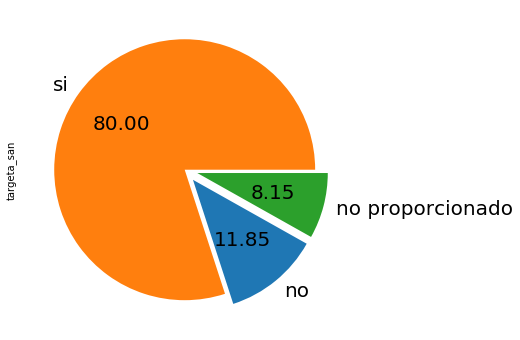

In [220]:
#Targeta Sanitaria Pie chart 
plot = df['targeta_san'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), fontsize = 20,
                                             colors = ['tab:orange', 'tab:blue', 'tab:green'], explode = (0, 0.1, 0.1))

#### Cruce de datos entre "Servicios Sociales" & "Tarjeta Sanitaria"

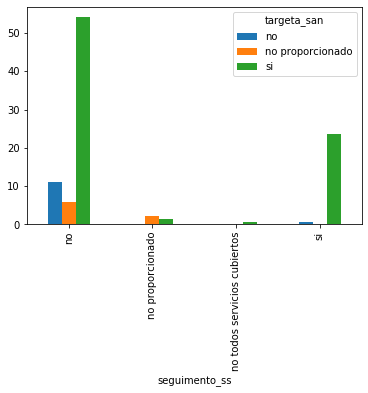

In [106]:
# Seguimiento Servicios Sociales Bar chart by Targeta Sanitaria
plot = pd.crosstab(index=df['seguimento_ss'],
            columns=df['targeta_san']).apply(lambda r: r/len(df) *100, axis=1).plot(kind='bar', )

__Seguimiento "Servicios Sociaels" & "Padron" & "Targeta Sanitaria" Commentarios:__

* Hemos observado que el 71% del total de la muestra analizada no pueden acceder a ayudas concedidas por los servicios sociales gestionados por los ayuntamientos, generalmente porque no estar empadronados, por lo que solo un 24% de la muestra puede acceder a este tipo de servicios. 

* Sin embargo, al revisar la variable empadronamiento, hemos verificado que cerca del 80% de la muestra posee empadronamiento en la comunidad de Cataluña, por lo que los datos no siguen una relación positiva en lo que respecta al empadronamiento y al acceso a los servicios sociales.

* Por otra parte, hemos observado que un 80% de la muestra dispone de tarjeta sanataria, por lo que pueden acceder a servicios de la seguridad social en caso de necesitarlos. Tan solo un 11,85% de la muestra ha alegado no tener tarjeta sanitaria, pero a raiz del COVID-19 todo el mundo puede tener acceso a una targeta sanitaria provisional.

* Un 3,7% de la muestra no ha dado datos sobre acceso a los servicios sociales y un 11,85% no ha dada datos sobre la disposición de la targeta sanitaria.

#### 4.5.4 Expectativas sobre Integramanet  

#### a) Limpieza de datos

In [107]:
df['espera_dIntegramanet'].head(10)

0     Servei Ocupacio
1                 NaN
2     Servei Ocupacio
3                 NaN
4     Servei Ocupacio
6                 NaN
7                 NaN
8     Servei Ocupacio
9     Servei Ocupacio
10    Servei Ocupacio
Name: espera_dIntegramanet, dtype: object

In [108]:
#replace nan values for "No proporcionado"
df['espera_dIntegramanet'] = df['espera_dIntegramanet'].replace(np.nan, 'no proporcionado', regex=True)

In [109]:
# Converting lowercase to uppercase
df['espera_dIntegramanet'] = df['espera_dIntegramanet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [110]:
#replace 'x' values for "todo"
df['espera_dIntegramanet'] = df['espera_dIntegramanet'].replace('x', 'todo', regex=True)

#### b) Visualizaciones

In [111]:
#"Expectativas sobre Integramenet"  relateive frequency table
100 * df['espera_dIntegramanet'].value_counts() / len(df['espera_dIntegramanet']) 

trabajo                        28.148148
no proporcionado               25.925926
servei ocupacio                25.925926
todo                            8.148148
servei ocupacio / formacion     3.703704
orientacion laboral             3.703704
formación                       2.962963
trabajo/formación               0.740741
social                          0.740741
Name: espera_dIntegramanet, dtype: float64

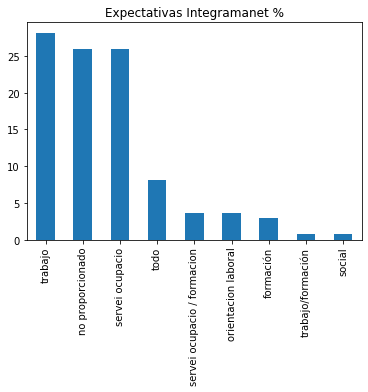

In [112]:
#alimentacio bar chart
plot = (100 * df['espera_dIntegramanet'].value_counts() / len(df['espera_dIntegramanet'])).plot(kind='bar', title='Expectativas Integramanet %')

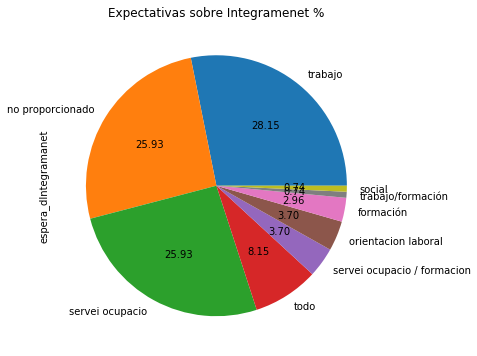

In [113]:
#"Expectativas sobre Integramenet" Pie chart 
plot = df['espera_dIntegramanet'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), 
                                             title='Expectativas sobre Integramenet %')

#### c) Cruce de datos entre "Expectativas Integramanet" y "Genero"

In [114]:
# "Expectativas sobre Integramenet" total contigency relative table
pd.crosstab(index=df['espera_dIntegramanet'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero                               H          M         All
espera_dIntegramanet                                         
formación                     0.740741   2.222222    2.962963
no proporcionado              5.185185  20.740741   25.925926
orientacion laboral           0.000000   3.703704    3.703704
servei ocupacio               4.444444  21.481481   25.925926
servei ocupacio / formacion   0.740741   2.962963    3.703704
social                        0.000000   0.740741    0.740741
todo                          2.222222   5.925926    8.148148
trabajo                       2.962963  25.185185   28.148148
trabajo/formación             0.740741   0.000000    0.740741
All                          17.037037  82.962963  100.000000

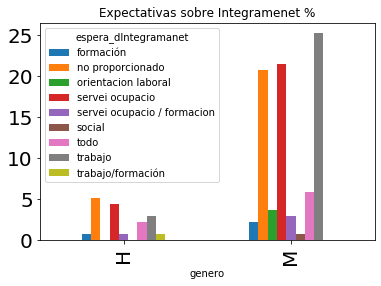

In [222]:
# "Expectativas sobre Integramenet" Bar chart by gender 
plot = pd.crosstab(index=df['genero'],
            columns=df['espera_dIntegramanet']).apply(lambda r: r/len(df) *100, 
                                              axis=1).plot(kind='bar', fontsize = 20, title='Expectativas sobre Integramenet %')

__Expectativas sobre Integramenet Commentarios:__

* Observamos que más de la mitad de la muestra analizada espera que Integramanet le ayuda a consiguir empleo, ya bien sea a través del *Servei de Ocupacio* (categoria que representa cerca de un 26% de la muestra), o bien de *forma directa* (el cual representa a un total del 28,15% de la muestra). 

* Entre los que quieren conseguir un trabajo, observamos que las mujeres lideran esta categoria, sumando más del 46% respecto al 54,07% (trabajo + servei de ocupacio), mientras que el colectivo masculino logra sumar más de un 7,4%.

* Respecto a la formación ( cursos del servei de ocupació) y al asesoramiento sobre inserción laboral, observamos que cerca del 11% de la muestra está interesado en recibir dichos servicios a través de Integramanet.  

* Del total de la muestra, cerca de un 26% no ha aportado datos sobre las expectativas que tienen sobre Integramenet. __¿Esto es negativo o positivo?__

#### 4.5.5 Autoevaluación psico-emocional  

#### a) Limpieza de datos

In [116]:
df['autovaloracion_psicoemo'].head(10)

0     NaN
1       8
2       5
3       7
4     NaN
6       9
7       9
8       9
9       3
10      5
Name: autovaloracion_psicoemo, dtype: object

In [117]:
#replace nan values for "No proporcionado"
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace(np.nan, 'no proporcionado', regex=True)

In [118]:
# Converting lowercase to uppercase
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Keeping in mind the comments provided by Neus, we can define the psycho-emotional scale as follows:
* Bad => 0% - 25%
* Stress => 25% - 50%
* Regular => 50% - 70%
* Good => 70% - 100%

We proceed to adjust the sample values according to the scale.

In [119]:
#replace values in the range (0 -2.5) with 'malo'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace('2', 'malo', regex=True)

In [120]:
#replace "malament" values with 'malo'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace('malament', 'malo', regex=True)

In [121]:
#replace values in the range (2.6 - 5) with 'estres'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace(['5', '4', '3'], 'estres', regex=True)

In [122]:
#replace values in the range (5.6 - 7) with 'regular'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace(['6', '7'], 'regular', regex=True)

In [123]:
#replace values in the range (7.6 - 10) with 'bueno'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace(['8', '9'], 'bueno', regex=True)

In [124]:
#replace values in the range (7.6 - 10) with 'bueno'
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace('be', 'bueno', regex=True)

In [125]:
#replace X values for "No proporcionado"
df['autovaloracion_psicoemo'] = df['autovaloracion_psicoemo'].replace('x', 'no proporcionado', regex=True)

In [126]:
# autovaloracio psicoemocional frequency table
pd.value_counts(df['autovaloracion_psicoemo'])

estres              44
regular             36
bueno               29
malo                14
no proporcionado    12
Name: autovaloracion_psicoemo, dtype: int64

#### b) Visualizaciones

In [127]:
#habitatge relateive frequency table
100 * df['autovaloracion_psicoemo'].value_counts() / len(df['autovaloracion_psicoemo']) 

estres              32.592593
regular             26.666667
bueno               21.481481
malo                10.370370
no proporcionado     8.888889
Name: autovaloracion_psicoemo, dtype: float64

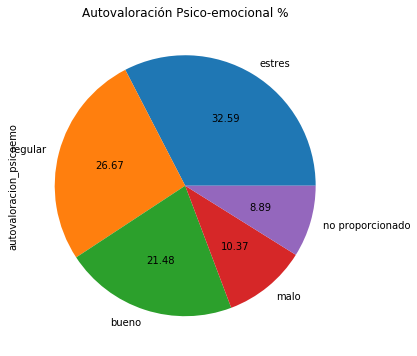

In [128]:
#autovaloracio_psicoemo Pie chart 
plot = df['autovaloracion_psicoemo'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), 
                                             title='Autovaloración Psico-emocional %')

#### c) Cruce de datos entre "Autoevaluacion psico-emocial" & "Genero"

In [129]:
# "Expectativas sobre Integramenet" total contigency relative table
pd.crosstab(index=df['autovaloracion_psicoemo'], columns=df['genero'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

genero                           H          M         All
autovaloracion_psicoemo                                  
bueno                     2.962963  18.518519   21.481481
estres                    7.407407  25.185185   32.592593
malo                      0.740741   9.629630   10.370370
no proporcionado          2.222222   6.666667    8.888889
regular                   3.703704  22.962963   26.666667
All                      17.037037  82.962963  100.000000

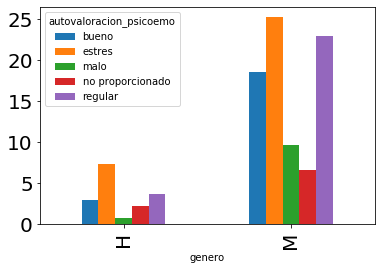

In [224]:
# Alimentacio Bar chart by gender 
plot = pd.crosstab(index=df['genero'],
            columns=df['autovaloracion_psicoemo']).apply(lambda r: r/len(df) *100,
                                              axis=1).plot(kind='bar', fontsize = 20)

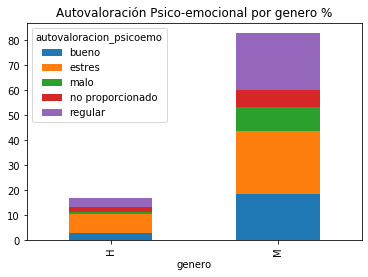

In [131]:
# Gráfico de barras de Autovaloracion psico-emocional segun genero
plot = pd.crosstab(index=df['genero'],
            columns=df['autovaloracion_psicoemo']
                  ).apply(lambda r: r/len(df) *100,
                          axis=0).plot(kind='bar', stacked=True, title='Autovaloración Psico-emocional por genero %')

__Autovaloración psico-emocional - Commentarios:__

* Observamos que más de la mitad de la muestra se encuentra en una situación negativa animicamente por el COVID-19. Gran parte del colectivo feminino como el masculidado han sido evaluados bajo una situación de estrés (un 32,59% sobre el total de la muestra), mientras que el 10% han sido valorados por encontrarse en una situación anímica mala. 

* Del total de la muestra analizada, solo el 21,48% han logrado superar positivamente la autovaloración psico-emocional, mientras que el 26,67% se han categorizado por estar en una situación regular para afrontar la crisis del COVID-19.

* Del total de la muestra, cerca de un 9% no ha manifestado ningún dato respecto a su situación anímica tras la crisis del COVID-19. __¿Esto es negativo o positivo?__